### Customer segmentation:

Customer Personality Analysis (please click on the name) is a publicly available dataset on Kaggle. Acknowledgement: The dataset was provided by Dr. Omar Romero-Hernandez.https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download
The dataset has 2240 entries that represent customers' interaction with the company's products. 
It also has 29 features.The customer data will be used to segment and create clusters of customers. 
The company can use this segmentation to strategize its marketing or product strategies.




In [532]:
#Imported libraries:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import ssl

In [533]:
data=pd.read_csv("marketing_campaign.csv", sep="\t")
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [535]:
# checking for missing values:
#data.isna().any()
data.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

52247.25135379061
666666.0


<AxesSubplot:>

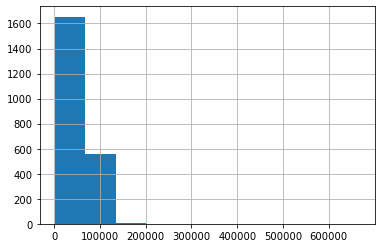

In [536]:
print(data['Income'].mean())
print(data['Income'].max())
#print(data['Income'].value_counts())
data['Income'].hist()


In [537]:
# Since the max value is very high compared to the mean and the  distribution is skewed the missing values will be 
# replaced by medean and not the mean.
median=data['Income'].median()
print(median)
data['Income']=data['Income'].fillna(data['Income'].median())
print(data.isna().sum())


51381.5
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [538]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [539]:
# The two features Z_CostContact and Z_Revenue look unimformative, looks like they have the same value for all entress.
print(data.Z_CostContact.value_counts())
print(data.Z_Revenue.value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


In [540]:
# After validating that this two features uninformative , these columns will be dropped.
data=data.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
print(data.head())
data.columns

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [541]:
#data.Dt_Customer.hist()
data.Dt_Customer=pd.to_datetime(data.Dt_Customer)
#data.Dt_Customer.plot()
#data['month']=data.Dt_Customer.dt.month
#print(data['month'])

In [542]:
#select columns of dtype 'object'
print(data.select_dtypes("object"))
print(data.Education.value_counts())
print(data.Marital_Status.value_counts())


       Education Marital_Status
0     Graduation         Single
1     Graduation         Single
2     Graduation       Together
3     Graduation       Together
4            PhD        Married
...          ...            ...
2235  Graduation        Married
2236         PhD       Together
2237  Graduation       Divorced
2238      Master       Together
2239         PhD        Married

[2240 rows x 2 columns]
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [543]:
# There is a problem with marital status values.There are 3 responces that we need to check. 
#One hot encoding for two categorigal data with strings will be performed later when preprocessing.
# First this rowed willbe isolated to see if there are other problems with the answers.

data_spot=data.loc[data['Marital_Status'].isin(['Alone', 'YOLO', 'Absurd'])]
data_spot.T
data['Marital_Status'].loc[data['Marital_Status']=='Alone']='Single'
data['Marital_Status'].loc[data['Marital_Status'].isin(['YOLO', 'Absurd'])]="Other"
print(data['Marital_Status'].value_counts())

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Other         4
Name: Marital_Status, dtype: int64


C:\Users\Diana\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [544]:
# Check for duplicated rows:
data.duplicated().sum()
# There are no duplicated rows

0

<AxesSubplot:ylabel='Education'>

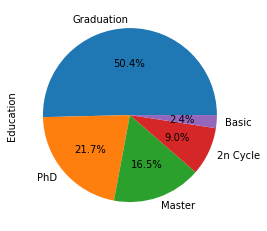

In [564]:
# Categorical values:
data.Education.value_counts().plot(kind='pie' , autopct='%1.1f%%')

Text(0.5, 1.0, 'Marital Status')

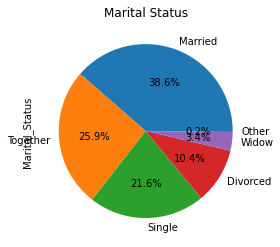

In [546]:
data.Marital_Status.value_counts().plot(kind='pie', figsize=(4,4), autopct='%1.1f%%')
plt.title("Marital Status")

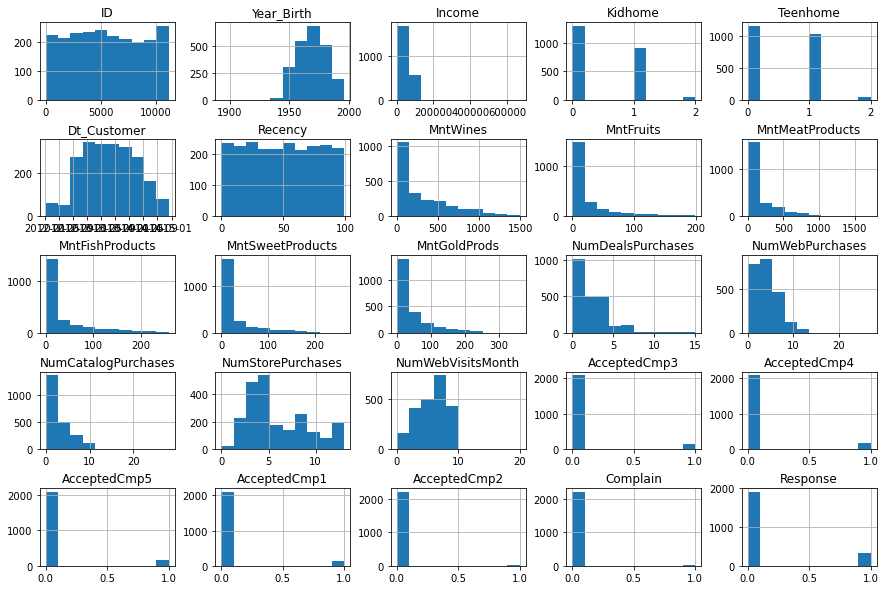

In [547]:
data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

In [548]:
# Check feauters that had very high maximum values.
data['Kidhome'].value_counts()
      #'Teenhome', 'Recency', 'AcceptedCmp3' ,'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1' ,'AcceptedCmp2' , 'Complain' ]].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [549]:
# Check feauters that had very high maximum values or nonlogical prices (like 9 dolars fro gold).


q1=data['MntMeatProducts'].quantile(0.95)
print(q1)
print(data['MntMeatProducts'][data['MntMeatProducts']>q1])
data['MntMeatProducts'][data['MntMeatProducts']==1725]=data['MntMeatProducts'].median()
print(data['MntMeatProducts'].loc[21])
#The high nuber does look like an outlier
# and will be dropped.????????????????????????????????????

687.0999999999995
21      1725
29       801
51       780
76       925
77       779
        ... 
2176     689
2187     749
2193     845
2211     860
2228    1607
Name: MntMeatProducts, Length: 112, dtype: int64
67


<ipython-input-549-ff934886763d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MntMeatProducts'][data['MntMeatProducts']==1725]=data['MntMeatProducts'].median()


In [550]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [551]:
# Check for otliers on the higher end based on the distributions. also to check for mistakes
def check_outliers(column):
    q1=data[column].quantile(0.90)
    #print(q1)
    k=data[column][data[column]>q1].sort_values()
    return k
    
columns_tocheck=['Year_Birth','Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for column in columns_tocheck:
    print(check_outliers(column))
    

# Income column defenetly has an outlier.
# Others maybe not mistakes but higher end of the distribution will not bre changed but considered when modeling. some models 
#take that into account.

7       1985
1665    1985
1564    1985
251     1985
651     1985
        ... 
1850    1995
696     1995
2213    1995
1170    1996
46      1996
Name: Year_Birth, Length: 221, dtype: int64
1096     79803.0
2087     79823.0
1563     79865.0
557      79908.0
228      79930.0
          ...   
164     157243.0
1300    157733.0
687     160803.0
617     162397.0
2233    666666.0
Name: Income, Length: 224, dtype: float64
777     90
1281    90
413     90
765     90
177     90
        ..
1894    99
444     99
1473    99
1800    99
1171    99
Name: Recency, Length: 218, dtype: int64
1354     823
1864     823
219      824
895      825
49       826
        ... 
917     1478
2098    1486
559     1492
824     1492
1749    1493
Name: MntWines, Length: 224, dtype: int64
266      84
463      84
1469     84
1823     84
960      85
       ... 
1526    194
2217    194
1508    197
855     199
1480    199
Name: MntFruits, Length: 219, dtype: int64
18       498
270      499
1680     499
2134     500
875      5

In [552]:
data.Income.median()

51381.5

In [553]:
# hange the rwow with very high income an unusual number. This looks more like a mistake. 
print(data.loc[data.Income==666666.0].T)
# Other values look intact. We can cahmnge this mistake income value with the median. 
data.Income.loc[data.Income==666666.0]=data.Income.median()
print(data.Income.iloc[2233])
#Can This be used or droped????????????????????????????????????????

                                    2233
ID                                  9432
Year_Birth                          1977
Education                     Graduation
Marital_Status                  Together
Income                          666666.0
Kidhome                                1
Teenhome                               0
Dt_Customer          2013-02-06 00:00:00
Recency                               23
MntWines                               9
MntFruits                             14
MntMeatProducts                       18
MntFishProducts                        8
MntSweetProducts                       1
MntGoldProds                          12
NumDealsPurchases                      4
NumWebPurchases                        3
NumCatalogPurchases                    1
NumStorePurchases                      3
NumWebVisitsMonth                      6
AcceptedCmp3                           0
AcceptedCmp4                           0
AcceptedCmp5                           0
AcceptedCmp1    

C:\Users\Diana\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [554]:
# The lower bound of most features look good eccept Year of Birth and gold products purcheses. 
#The 25th percentile of goldpurchess look unusual, only 9. 
# There is a need to check the 'MntGoldProds' feature.

q1=data['Year_Birth'].quantile(0.25)
print(q1)
print(data['Year_Birth'][data['Year_Birth']<q1].sort_values())

q1=data['MntGoldProds'].quantile(0.25)
print(q1)
print(data['MntGoldProds'][data['MntGoldProds']<q1])

1959.0
239     1893
339     1899
192     1900
1950    1940
424     1941
        ... 
804     1958
1734    1958
828     1958
1877    1958
751     1958
Name: Year_Birth, Length: 519, dtype: int64
9.0
1       6
3       5
8       2
10      1
14      5
       ..
2216    6
2218    1
2223    3
2232    3
2236    8
Name: MntGoldProds, Length: 549, dtype: int64


In [555]:
# For gold products it makes sence as there are 549 lower values, meaning this is a standard price range for this type of products.
# For year of birth, there are three people that their date of birth was more than 122 year ago.
# These three rows will be droped , since we don't know their age and it's important for  correct clustering. 
#print(data.head())
mistakes_year=data['Year_Birth']<=1900
print(mistakes_year)
data=data[~mistakes_year]

data['Year_Birth'].min()                        

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Year_Birth, Length: 2240, dtype: bool


1940

56    37
30    32
54    32
46    31
49    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64


99

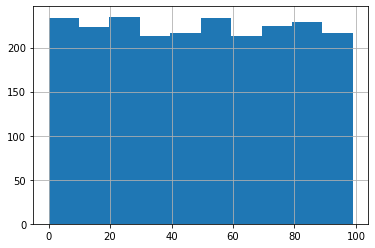

In [556]:
data.Recency.hist()
print(data.Recency.value_counts().sort_values(ascending=False))
data.Recency.max()

In [557]:
print(data.Recency.value_counts().sort_values(ascending=False))

56    37
30    32
54    32
46    31
49    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64


In [558]:
# Check for percent of response , it looks very low. 
columns_per=['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']

for col in columns_per:
    percent=data[col].value_counts()*100/len(data[col])
    print(percent)

1     43.227537
2     22.217255
3     13.276710
4      8.448815
5      4.202056
6      2.726866
0      2.056325
7      1.788109
8      0.625838
9      0.357622
15     0.312919
10     0.223514
11     0.223514
12     0.178811
13     0.134108
Name: NumDealsPurchases, dtype: float64
2     16.629414
1     15.780063
3     15.020116
4     12.472061
5      9.834600
6      9.164059
7      6.928923
8      4.559678
9      3.352705
0      2.190434
11     1.966920
10     1.922217
27     0.089405
23     0.044703
25     0.044703
Name: NumWebPurchases, dtype: float64
0     26.151095
1     22.172553
2     12.337953
3      8.225302
4      8.135896
5      6.258382
6      5.677246
7      3.531515
8      2.458650
10     2.145731
9      1.877515
11     0.849352
28     0.134108
22     0.044703
Name: NumCatalogPurchases, dtype: float64
3     21.904336
4     14.394278
2      9.879303
5      9.476978
6      7.957085
8      6.660706
7      6.392490
10     5.587841
9      4.738489
12     4.693786
13     3.710326


In [559]:
# We can see that the acceptance rate was low , the latest promotion were more accepted. 
#After better exploring the data We can create a new feature sum of privious promoshions, 0 didn't accept any.
#This will be hot encoded in preprocessing stage.
data_c=data
data_c['any_promo']=data_c[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
#print(data_c.head().T)
print(data_c.any_promo.value_counts())

0    1775
1     324
2      83
3      44
4      11
Name: any_promo, dtype: int64


In [560]:
# The clean data will be saved to a new file. The new columns will be used in the next notebook. 

data_c.to_csv('data_c.csv')
